In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")


plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10, 5)


In [5]:

df = pd.read_csv("coffee_sales_cleaned.csv")


df.head()


,order_date,order_time,payment_type,customer_card,amount_spent,product
0,2024-03-01,10:15:51,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,12:19:23,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,12:20:18,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,13:46:33,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,13:48:15,card,ANON-0000-0000-0004,38.7,Latte


In [6]:
df["order_ts"] = pd.to_datetime(df["order_date"] + " " + df["order_time"])

df["date"]       = df["order_ts"].dt.date
df["hour"]       = df["order_ts"].dt.hour
df["weekday"]    = df["order_ts"].dt.day_name()
df["month_name"] = df["order_ts"].dt.strftime("%b")


In [7]:
top_products = (df.groupby("product")["amount_spent"]
                  .agg(["count", "sum", "mean"])
                  .rename(columns={"count": "orders", "sum": "revenue", "mean": "avg_spend"})
                  .sort_values("revenue", ascending=False))

top_products.head(10)


,orders,revenue,avg_spend
product,,,
Latte,243,9009.14,37.074650
Americano with Milk,268,8601.94,32.096791
Cappuccino,196,7333.14,37.413980
Americano,169,4644.54,27.482485
Hot Chocolate,74,2778.48,37.547027
Cortado,99,2745.08,27.728081
Cocoa,35,1295.94,37.026857
Espresso,49,1100.62,22.461633


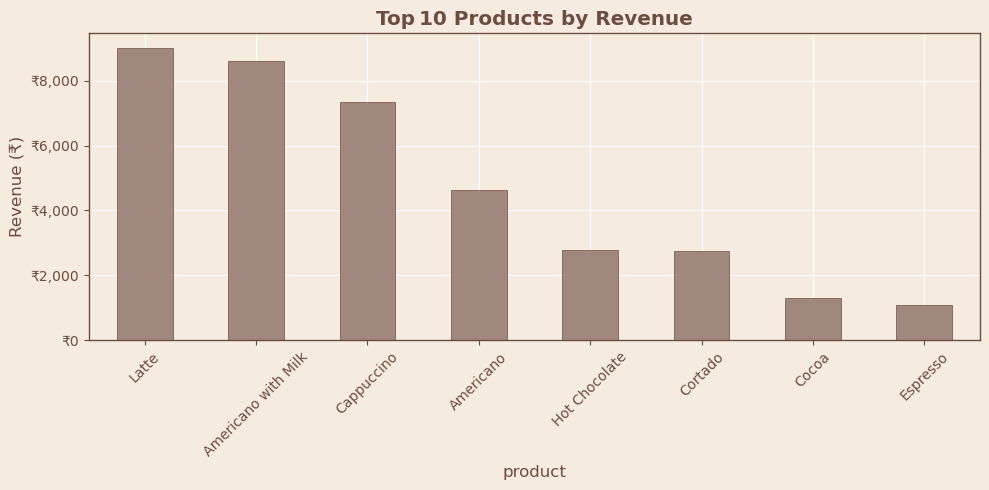

In [ ]:

from matplotlib.ticker import FuncFormatter

plt.rcParams.update({
    "axes.facecolor": "#f5ebe0",
    "figure.facecolor": "#f5ebe0",
    "axes.edgecolor": "#6d4c41",
    "axes.labelcolor": "#6d4c41",
    "xtick.color": "#6d4c41",
    "ytick.color": "#6d4c41",
    "text.color": "#6d4c41",
    "font.family": "sans-serif",  
    "axes.titleweight": "bold",
})

top_products["revenue"].head(10).plot(
    kind="bar",
    color="#a1887f",
    edgecolor="#6d4c41"
)

plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue (₹)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"₹{x:,.0f}"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


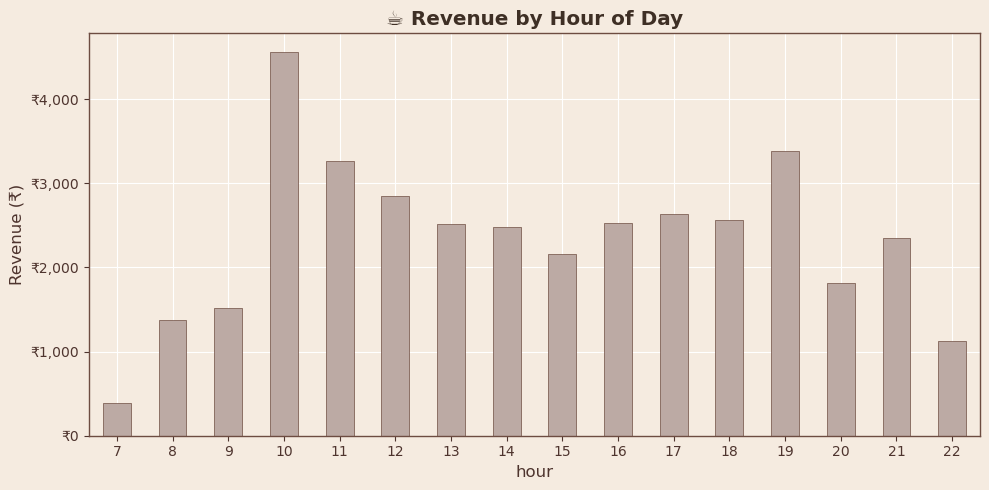

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.rcParams.update({
    "axes.facecolor": "#f5ebe0",        
    "figure.facecolor": "#f5ebe0",
    "axes.edgecolor": "#6d4c41",         
    "axes.labelcolor": "#4e342e",
    "xtick.color": "#4e342e",
    "ytick.color": "#4e342e",
    "text.color": "#3e2f25",
    "font.family": "sans-serif",        
    "axes.titleweight": "bold",
})

df.groupby("hour")["amount_spent"].sum().plot(
    kind="bar",
    color="#bcaaa4",                     
    edgecolor="#6d4c41"                  
)

plt.title("☕ Revenue by Hour of Day")
plt.ylabel("Revenue (₹)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"₹{x:,.0f}"))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


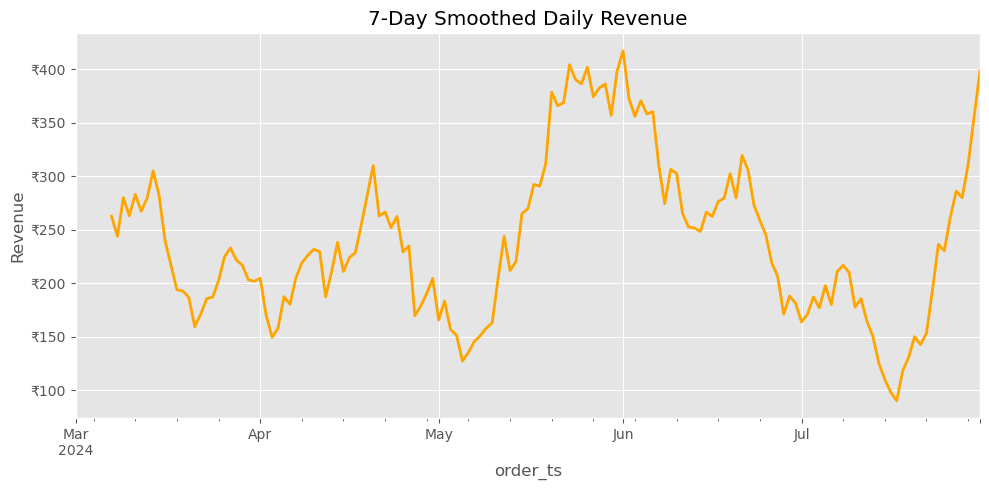

In [12]:
daily_rev = df.set_index("order_ts")["amount_spent"].resample("D").sum()
rolling_rev = daily_rev.rolling(window=7).mean()

rolling_rev.plot(color="orange", linewidth=2)
plt.title("7-Day Smoothed Daily Revenue")
plt.ylabel("Revenue")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"₹{x:,.0f}"))
plt.tight_layout()
plt.show()




In [ ]:

snapshot_date = df["order_ts"].max() + pd.Timedelta(days=1)

rfm = df.groupby("customer_card").agg(
    recency = ("order_ts", lambda x: (snapshot_date - x.max()).days),
    frequency = ("order_ts", "count"),
    monetary = ("amount_spent", "sum")
)


rfm.head()




,recency,frequency,monetary
customer_card,,,
ANON-0000-0000-0001,56,17,646.14
ANON-0000-0000-0002,153,2,77.40
ANON-0000-0000-0003,3,23,651.96
ANON-0000-0000-0004,108,9,289.50
ANON-0000-0000-0005,153,1,33.80
